In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [56]:
d = pd.read_csv("C:\\projects\\mlproject\\notebook\\data\\StudentsPerformance.csv")

In [57]:
d.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [58]:
df = pd.DataFrame(d)

In [59]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [60]:
df.shape

(1000, 8)

In [61]:
df = df.rename(columns = {"race/ethnicity": "race_ethnicity","parental level of education":"parental_level_of_education","test preparation course":"test_preparation_course","math score":"math_score","reading score":"reading_score","writing score":"writing_score"})

In [62]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [63]:
#check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [64]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [65]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [66]:
#checking the number of unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [67]:
#check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [68]:
#define the numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [69]:
print("We have {} numerical features:{}".format(len(numerical_features),numerical_features))
print("\n We have {} categorical features:{}".format(len(categorical_features),categorical_features))

We have 3 numerical features:['math_score', 'reading_score', 'writing_score']

 We have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [70]:
df["total_score"] = df["math_score"] + df["reading_score"] +df["writing_score"]
df["Average"] = df["total_score"]/3

In [71]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [72]:
math_full = df[df["math_score"] == 100]["math_score"].count()
writing_full = df[df["writing_score"] == 100]["writing_score"].count()
reading_full = df[df["reading_score"] == 100]["reading_score"].count()

In [73]:
print(f"The number of students with full marks in Math:{math_full}")
print(f"The number of students with full marks in reading:{reading_full}")
print(f"The number of students with full marks in writing:{writing_full}")


The number of students with full marks in Math:7
The number of students with full marks in reading:17
The number of students with full marks in writing:14


In [74]:
math_less_30 = df[df["math_score"] <= 30]["math_score"].count()
reading_less_30 = df[df["reading_score"] <= 30]["reading_score"].count()
writing_less_30 = df[df["writing_score"] <= 30]["writing_score"].count()

In [75]:
print(f"Number of students with less than 30 marks in math {math_less_30} ")
print(f"Number of students with less than 30 marks in reading {reading_less_30} ")
print(f"Number of students with less than 30 marks in writing {writing_less_30} ")

Number of students with less than 30 marks in math 16 
Number of students with less than 30 marks in reading 8 
Number of students with less than 30 marks in writing 10 


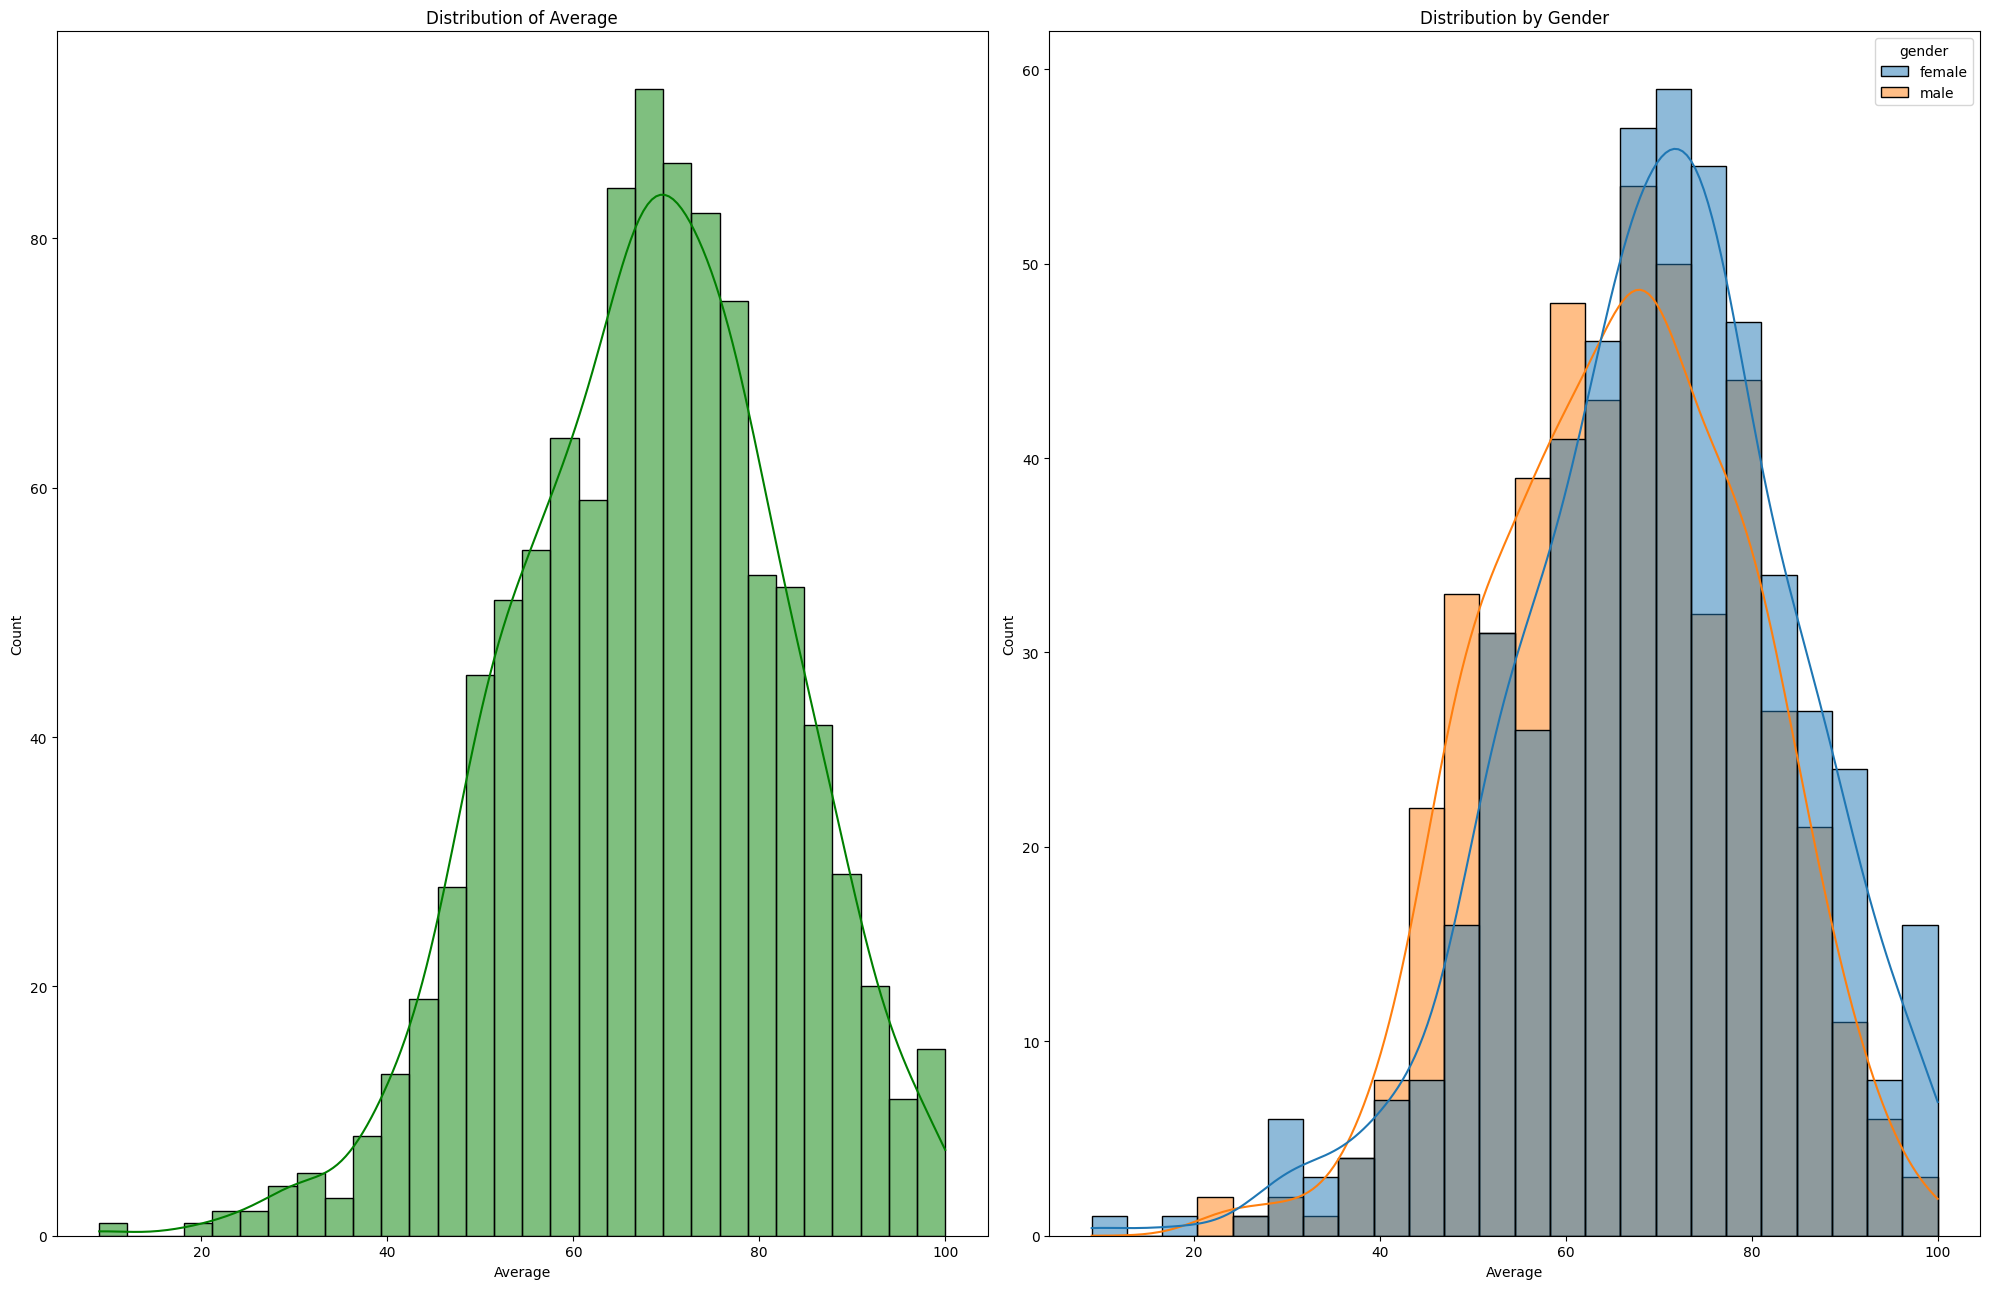

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 13))  # 1 row, 2 columns

# First subplot
sns.histplot(data=df, x="Average", bins=30, kde=True, color="g", ax=axs[0])
axs[0].set_title("Distribution of Average")

# Second subplot
sns.histplot(data=df, x="Average", kde=True, hue="gender", ax=axs[1])
axs[1].set_title("Distribution by Gender")

plt.tight_layout()
plt.show()


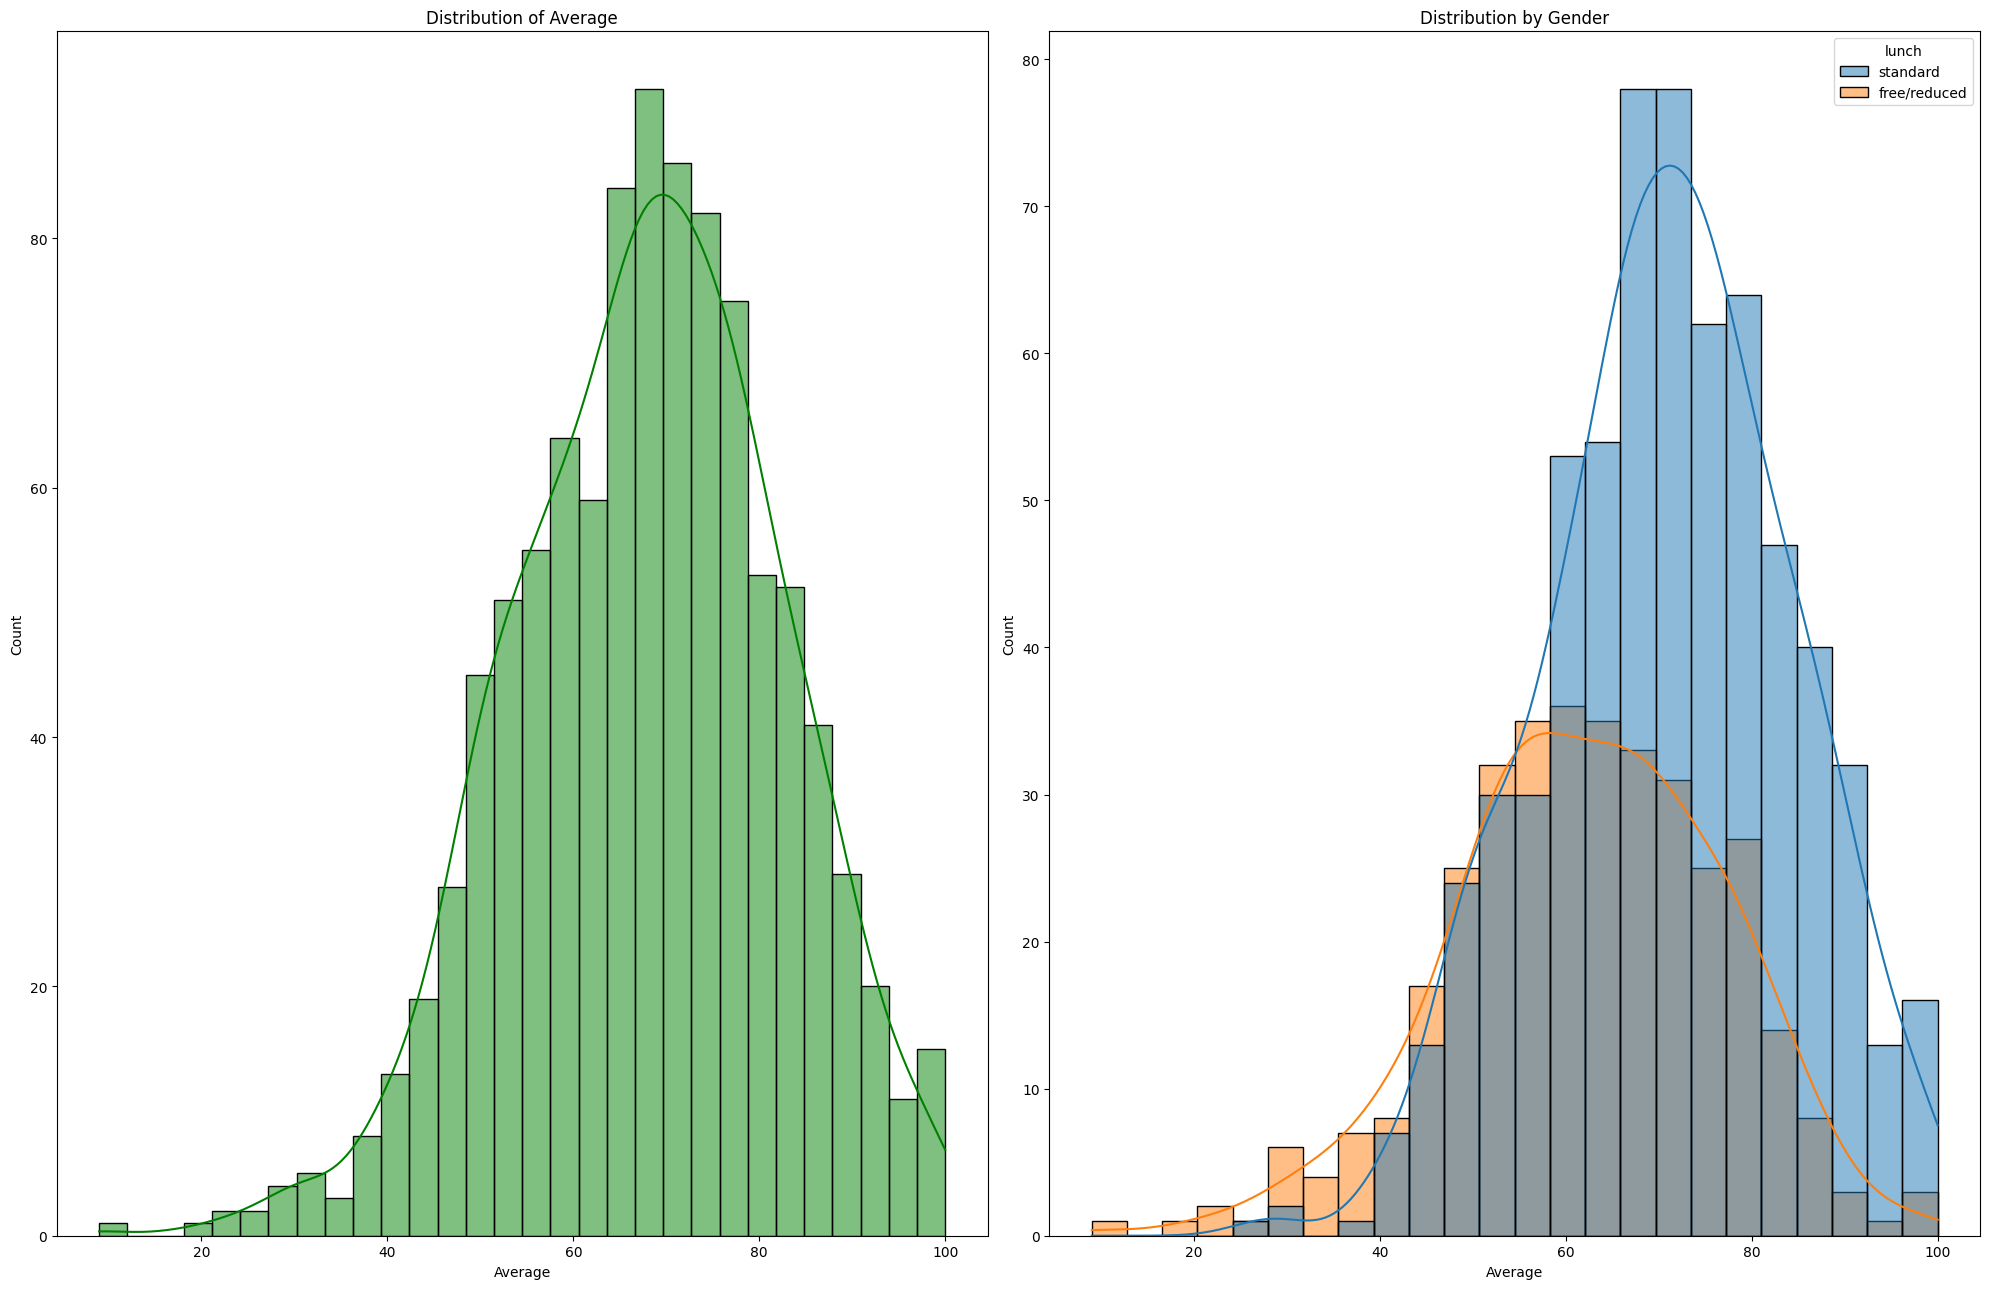

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 13))  # 1 row, 2 columns

# First subplot
sns.histplot(data=df, x="Average", bins=30, kde=True, color="g", ax=axs[0])
axs[0].set_title("Distribution of Average")

# Second subplot
sns.histplot(data=df, x="Average", kde=True, hue="lunch", ax=axs[1])
axs[1].set_title("Distribution by Gender")

plt.tight_layout()
plt.show()


ValueError: Could not interpret value `parental level of education` for `hue`. An entry with this name does not appear in `data`.

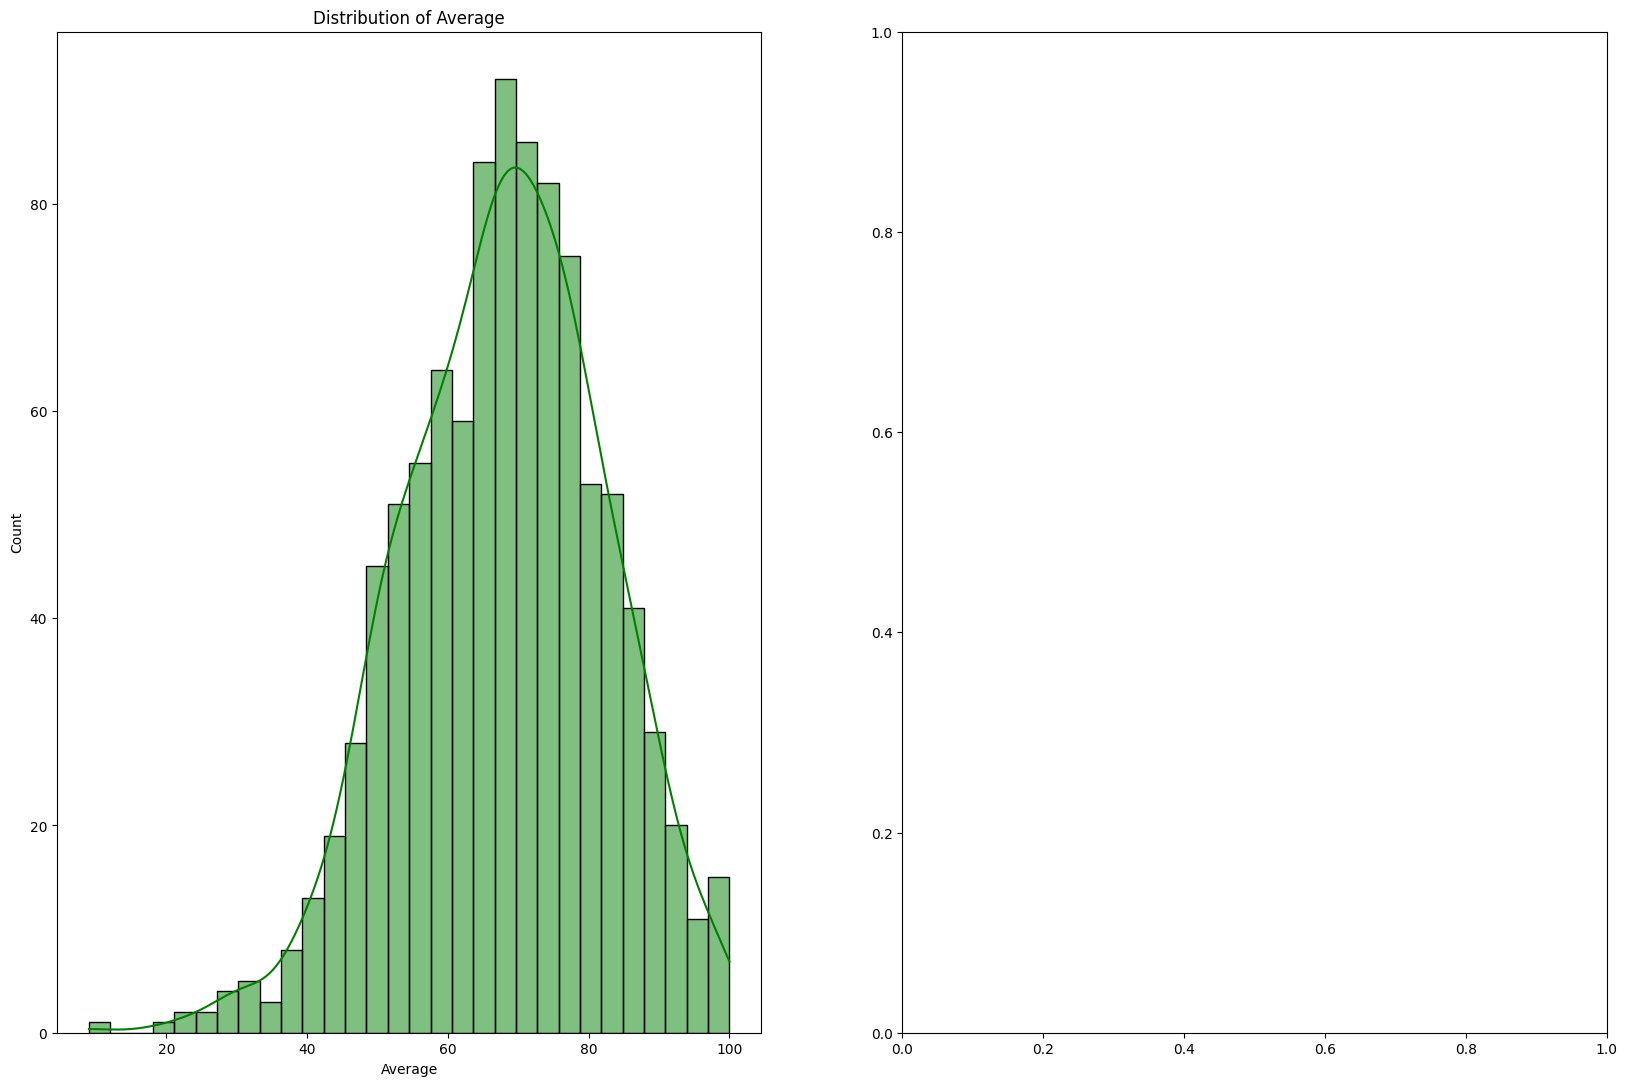

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 13))  # 1 row, 2 columns

# First subplot
sns.histplot(data=df, x="Average", bins=30, kde=True, color="g", ax=axs[0])
axs[0].set_title("Distribution of Average")

# Second subplot
sns.histplot(data=df[df["gender"] == "male"], x="Average", kde=True, hue="parental level of education", ax=axs[1])
axs[1].set_title("Distribution by Gender")

sns.histplot(data=df[df["gender"] == "female"], x= "Average", kde=True, hue="parental level of education", ax=axs[1])
axs[1].set_title("Distribution by Gender")

plt.tight_layout()
plt.show()
